# Import library
Importing python libraries for data processing and visualization.

In [1]:
%pylab inline
import pandas
from sklearn.ensemble import GradientBoostingClassifier
import evaluation

Populating the interactive namespace from numpy and matplotlib


# Read training data
The dataset provided by Kaggle are in zipped CSV format. We put them under the sub-directory 'tau_data/'. Pandas can help us parse and import the data.

In [2]:
folder = 'tau_data/'
train = pandas.read_csv(folder + 'training.csv.zip', index_col='id')

train['FlightDistSig'] = train['FlightDistance'] / train['FlightDistanceError']
train['SPDhitsI'] = train['SPDhits'] > 150

Let's have a glimpse on the provided training sample:

In [3]:
print('There are '+str(len(train))+' entries.')
train.head()

There are 67553 entries.


,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,DOCAtwo,...,p0_eta,p1_eta,p2_eta,SPDhits,production,signal,mass,min_ANNmuon,FlightDistSig,SPDhitsI
id,,,,,,,,,,,,,,,,,,,,,
18453471,0.001578,0.999999,14.033335,0.681401,0.016039,0.451886,1.900433,1482.037476,0.066667,0.060602,...,3.076006,4.003800,4.031514,458,-99,0,1866.300049,0.277559,20.594827,True
5364094,0.000988,0.999705,5.536157,0.302341,0.142163,9.564503,0.865666,3050.720703,0.024022,0.019245,...,3.228553,2.786543,2.975564,406,-99,0,1727.095947,0.225924,18.310984,True
11130990,0.000877,0.999984,6.117302,0.276463,0.034746,1.970751,10.975849,3895.908691,0.055044,0.047947,...,3.536903,2.865686,3.052810,196,-99,0,1898.588013,0.368630,22.127042,True
15173787,0.000854,0.999903,5.228067,0.220739,0.076389,4.271331,3.276358,4010.781738,0.053779,0.006417,...,3.087461,3.218034,2.375592,137,-99,0,1840.410034,0.246045,23.684371,False
1102544,0.001129,0.999995,39.069534,1.898197,0.120936,4.984982,0.468348,4144.546875,0.004491,0.037326,...,4.632295,4.711155,4.296878,477,-99,0,1899.793945,0.222060,20.582441,True


# Correlation Matrix of the Features

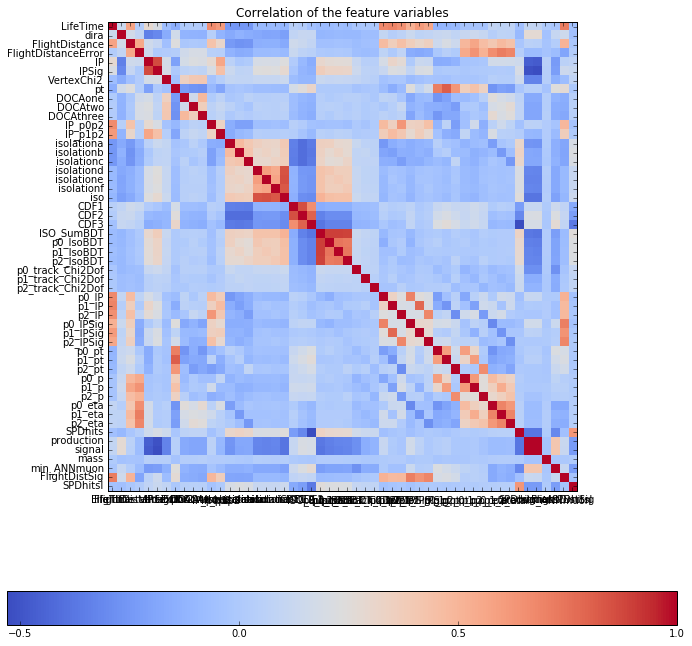

In [4]:
#import seaborn as sns

# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig, ax = subplots(figsize=(12, 12))

#cax = ax.imshow(train.corr(), interpolation='nearest', cmap=cm.afmhot)
cax = ax.imshow(train.corr(), interpolation='nearest', cmap=cm.coolwarm)
ax.set_title('Correlation of the feature variables')

# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax, ticks=[-1, -0.5, 0, 0.5, 1], orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1', '0', '> 1'])

labels = train.columns
xticks(range(len(train.columns)), train.columns);
yticks(range(len(train.columns)), train.columns);

show()



# Separation Power of the Features

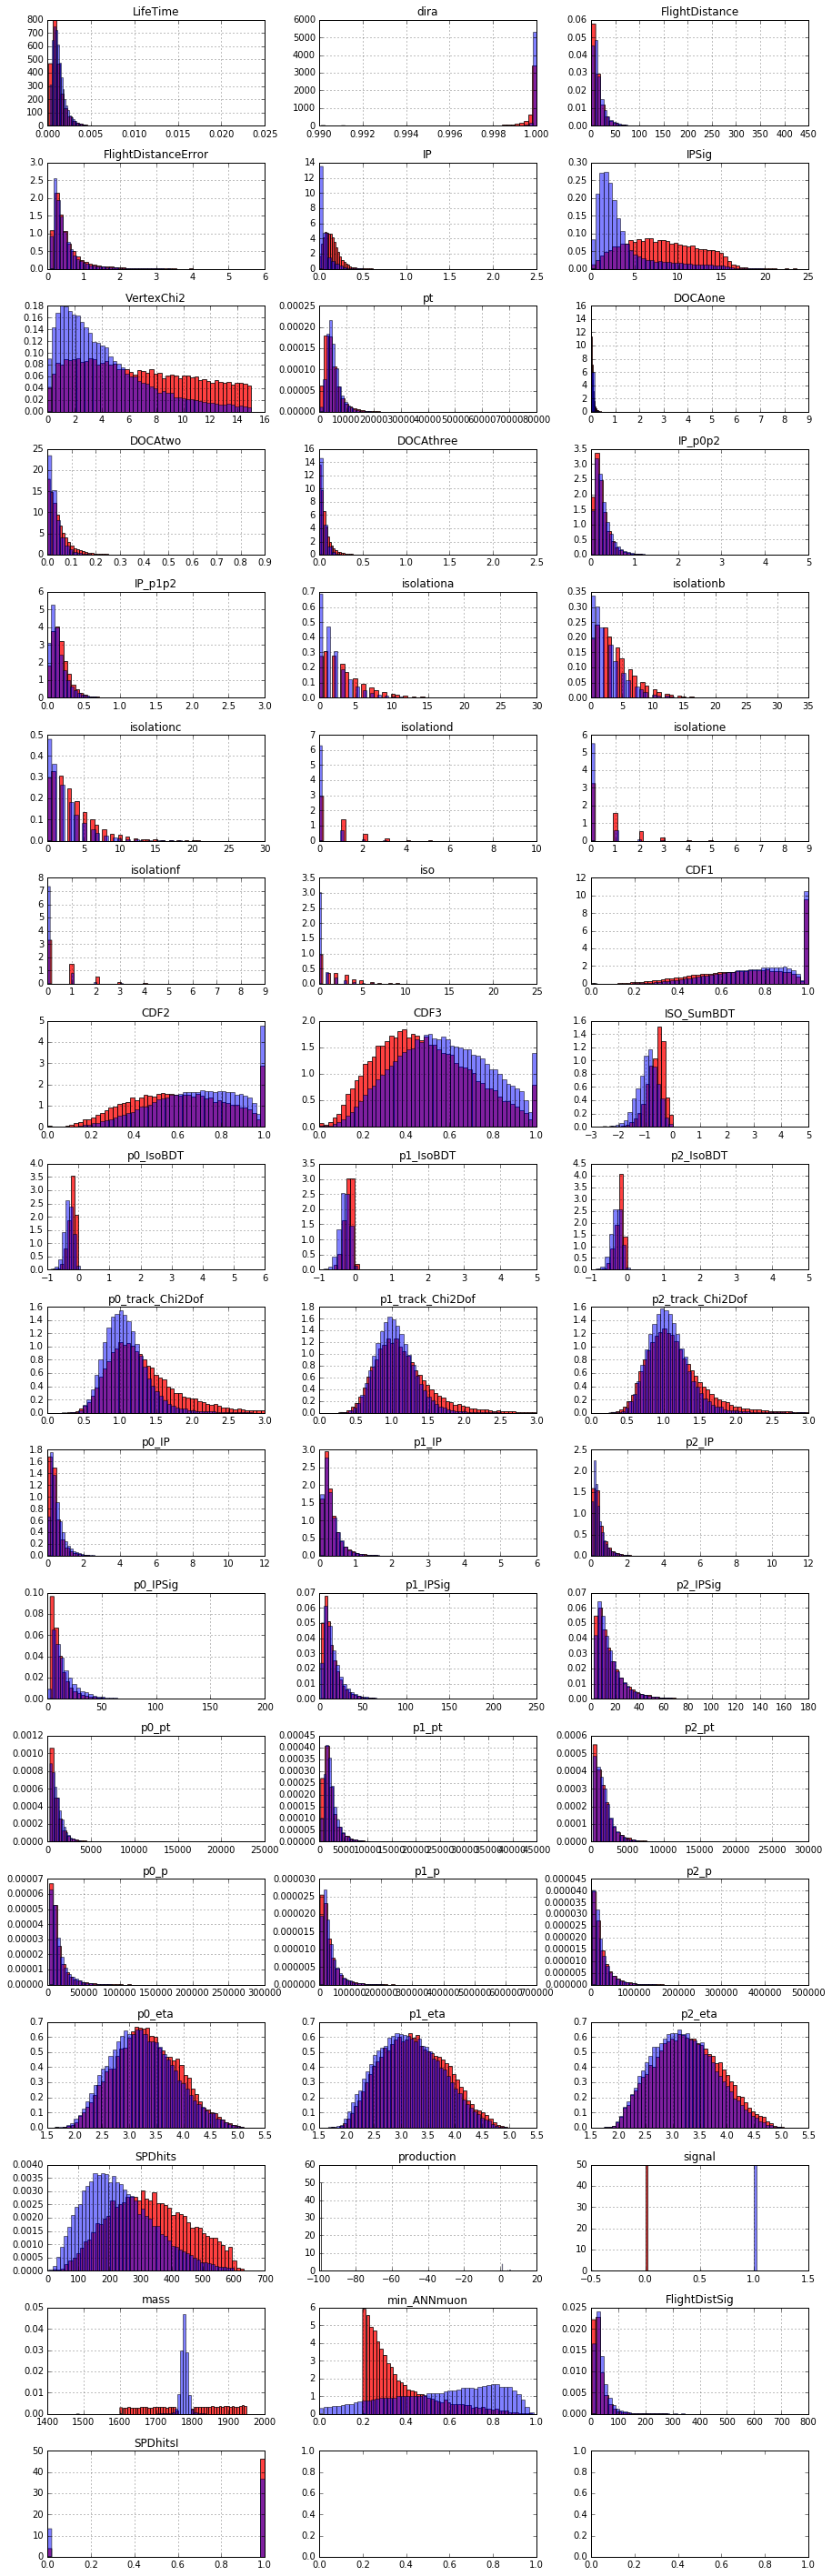

In [5]:
# the histogram of the data

idx = 0

f, axarr = subplots(18, 3, figsize=(15, 50))
f.subplots_adjust(wspace=0.25, hspace=0.35)

for var in train.columns[:] :
    col = idx % 3
    row = int(idx/3)

    # making histogram plots for signal over background
    n, bins, patches = axarr[row, col].hist(train[var][train['signal']==0], 50, normed=1, facecolor='red', alpha=0.75)
    n, bins, patches = axarr[row, col].hist(train[var][train['signal']==1], 50, normed=1, facecolor='blue', alpha=0.5)

    axarr[row, col].set_title(var)
    #ylabel('Probability')
    #title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
    #axis([40, 160, 0, 0.03])
    axarr[row, col].grid(True)

    idx = idx + 1
    
show()

# Define training features
Here we use subset of the all features to pass the agreement checking. The two extra sets are setup for comparison purpose.

In [6]:
variables = ['LifeTime',
             'FlightDistance',
             'pt',
             ]
var1 = ['LifeTime', 'FlightDistance', 'FlightDistanceError', 'pt', 'IP', 'IPSig', 'iso', 'ISO_SumBDT', 'SPDhitsI', 'DOCAone', 'DOCAtwo', 'DOCAthree', 'isolationa',]
var2 = ['LifeTime', 'FlightDistance', 'FlightDistSig', 'pt', 'IP', 'IPSig', 'iso', 'ISO_SumBDT', 'SPDhitsI', 'DOCAone', 'DOCAtwo', 'DOCAthree', 'isolationa',]


# Baseline training
Three models are setup with the corresponding variable sets.

In [7]:
baseline = GradientBoostingClassifier(n_estimators=40, learning_rate=0.01, subsample=0.7,
                                      min_samples_leaf=10, max_depth=7, random_state=11)
baseline.fit(train[variables], train['signal'])

baseline1 = GradientBoostingClassifier(n_estimators=40, learning_rate=0.01, subsample=0.7,
                                      min_samples_leaf=10, max_depth=7, random_state=11)
baseline1.fit(train[var1], train['signal'])

baseline2 = GradientBoostingClassifier(n_estimators=40, learning_rate=0.01, subsample=0.7,
                                      min_samples_leaf=10, max_depth=7, random_state=11)
baseline2.fit(train[var2], train['signal'])


GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=7, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=10, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=40,
              presort='auto', random_state=11, subsample=0.7, verbose=0,
              warm_start=False)

# Check agreement test
The agreement test is done by comparing the distribution between tau -> three muons and Ds to phi pi, where phi to di-muons. The two sets are having the same topology so it's used to test the agreement of MVA output between the datasets. 

In [8]:
check_agreement = pandas.read_csv(folder + 'check_agreement.csv.zip', index_col='id')
check_agreement['FlightDistSig'] = check_agreement['FlightDistance'] / check_agreement['FlightDistanceError']
check_agreement['SPDhitsI'] = check_agreement['SPDhits'] > 150

agreement_probs = baseline.predict_proba(check_agreement[variables])[:, 1]

ks = evaluation.compute_ks(
    agreement_probs[check_agreement['signal'].values == 0],
    agreement_probs[check_agreement['signal'].values == 1],
    check_agreement[check_agreement['signal'] == 0]['weight'].values,
    check_agreement[check_agreement['signal'] == 1]['weight'].values)
print ('KS metric', ks, ks < 0.09)

agreement_probs1 = baseline1.predict_proba(check_agreement[var1])[:, 1]

ks1 = evaluation.compute_ks(
    agreement_probs1[check_agreement['signal'].values == 0],
    agreement_probs1[check_agreement['signal'].values == 1],
    check_agreement[check_agreement['signal'] == 0]['weight'].values,
    check_agreement[check_agreement['signal'] == 1]['weight'].values)
print ('KS metric1', ks1, ks1 < 0.09)

agreement_probs2 = baseline2.predict_proba(check_agreement[var2])[:, 1]

ks2 = evaluation.compute_ks(
    agreement_probs2[check_agreement['signal'].values == 0],
    agreement_probs2[check_agreement['signal'].values == 1],
    check_agreement[check_agreement['signal'] == 0]['weight'].values,
    check_agreement[check_agreement['signal'] == 1]['weight'].values)
print ('KS metric2', ks2, ks2 < 0.09)

KS metric 0.0681705596239 True
KS metric1 0.0779027964308 True
KS metric2 0.0774113060002 True


# Check correlation test

In [9]:
check_correlation = pandas.read_csv(folder + 'check_correlation.csv.zip', index_col='id')
check_correlation['FlightDistSig'] = check_correlation['FlightDistance'] / check_correlation['FlightDistanceError']
check_correlation['SPDhitsI'] = check_correlation['SPDhits'] > 150

correlation_probs = baseline.predict_proba(check_correlation[variables])[:, 1]
cvm = evaluation.compute_cvm(correlation_probs, check_correlation['mass'])
print ('CvM metric', cvm, cvm < 0.002)

correlation_probs1 = baseline1.predict_proba(check_correlation[var1])[:, 1]
cvm1 = evaluation.compute_cvm(correlation_probs1, check_correlation['mass'])
print ('CvM metric1', cvm1, cvm1 < 0.002)

correlation_probs2 = baseline2.predict_proba(check_correlation[var2])[:, 1]
cvm2 = evaluation.compute_cvm(correlation_probs2, check_correlation['mass'])
print ('CvM metric2', cvm2, cvm2 < 0.002)

CvM metric 0.000981509354914 True
CvM metric1 0.00113938489831 True
CvM metric2 0.00109616714203 True


# Compute weighted AUC on the training data with min_ANNmuon > 0.4
The cut value on min_ANNmuon is suggested by LHCb. One can grab more information from the derived features.

In [10]:
train_eval = train[train['min_ANNmuon'] > 0.4]
train_probs = baseline.predict_proba(train_eval[variables])[:, 1]
AUC = evaluation.roc_auc_truncated(train_eval['signal'], train_probs)
print ('AUC', AUC)

train_probs1 = baseline1.predict_proba(train_eval[var1])[:, 1]
AUC1 = evaluation.roc_auc_truncated(train_eval['signal'], train_probs1)
print ('AUC1', AUC1)

train_probs2 = baseline2.predict_proba(train_eval[var2])[:, 1]
AUC2 = evaluation.roc_auc_truncated(train_eval['signal'], train_probs2)
print ('AUC2', AUC2)


AUC 0.834346386627
AUC1 0.980483753621
AUC2 0.980792085472


# Predict test, create file for kaggle

In [11]:
test = pandas.read_csv(folder + 'test.csv.zip', index_col='id')
result = pandas.DataFrame({'id': test.index})
result['prediction'] = baseline.predict_proba(test[variables])[:, 1]

In [12]:
result.to_csv('baseline.csv.gz', index=False, sep=',')

In [13]:
!ls -l baseline.csv.gz

-rw-r--r--  1 john  staff  23422381  5 29 04:30 baseline.csv.gz


### One can check the funtion definition through Jupyter interface:

In [14]:
result.to_csv?